<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

---

# 고차원 데이터

## 🏆 학습 목표 

- Vector transformation의 목적과 사용예시를 설명 할 수 있다.
- eigenvector / eigenvalue를 설명 할 수 있다.
- 데이터의 feature 수가 늘어나면 생기는 문제점과 이를 handling 하기 위한 방법을 설명 할 수 있다.
- PCA의 목적과 기본원리를 설명 할 수 있다.

## ❓ 시작하기전에

- 고차원 데이터의 예시는 어떤것들이 있을까요?
- 데이터셋에 있는 여러 feature에 대해 우선 순위를 주려면 어떻게 해야 할까요?

---

## 벡터 변환

오늘은, $\mathbb{R}^2$ 공간에서 벡터를 변환 하는 것부터 시작하도록 하겠습니다.

여기서 말하는 변환, 즉 선형 변환은 임의의 두 벡터를 더하거나 혹은 스칼라 값을 곱하는 것을 의미합니다.

\begin{align}
T(u+v) = T(u)+T(v)
\\
T(cu) = cT(u)
\end{align}

<img src='https://user-images.githubusercontent.com/6457691/89977531-4a73b400-dca6-11ea-9f43-f0c1f124b70b.jpg' width = 600>

<img src='https://user-images.githubusercontent.com/6457691/89978398-64ae9180-dca8-11ea-8762-bfa0e9f9943e.png' width = 600>

결국 목적은 벡터(데이터)를 스케일을 바꾸거나 더하는 것(Feature Engineering과 유사)

## 벡터 변환으로써의 매트릭스-벡터의 곱 

임의의 벡터 ($x1$, $x2$)에 대해서, ($2x1 + x2$, $x1 -3x2$)로 변환을 한다고 가정을 해보도록 하겠습니다.

\begin{align}
f(\begin{bmatrix}x_1 \\ x_2\end{bmatrix}) = \begin{bmatrix} 2x_1 + x_2 \\ x_1 - 3x_2 \\  \end{bmatrix}
\end{align}

결과 매트릭스는 x1 과 x2 라는 일종의 "단위 벡터"로 다시 구성을 할 수 있습니다.

\begin{align}
T = \begin{bmatrix} 2 & 1 \\ 1 & -3 \end{bmatrix}
\end{align}


이 $T$라는 매트릭스를 원래 벡터 ($x1$, $x2$)에 곱했을 경우 transformation이 원하는 대로 이루어진다는 것을 알 수 있습니다.

이를 통해 임의의 $\mathbb{R}^2$ 벡터를 다른 $\mathbb{R}^2$ 내부의 벡터로 변환 하는 과정은, 특정 $T$라는 매트릭스를 곱하는 것과 동일한 과정이라는 것을 알 수 있습니다.

새로운 벡터 (3,4)에 대하여 동일한 필터로 transform 하는 경우, 방금 구한 $T$라는 매트릭스에 곱하는 것으로 쉽게 할 수 있습니다.


\begin{align}
\begin{bmatrix} 2 & 1 \\ 1 & -3 \end{bmatrix}\begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 10 \\ -9 \end{bmatrix}
\end{align}

벡터 transformation은, 선형 즉 곱하고 더하는 것으로만 이뤄진 transformation이기 때문에 매트릭스와 벡터의 곱으로 표현 할 수 있습니다. 

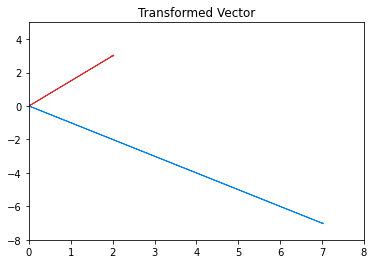

In [1]:
import matplotlib.pyplot as plt

input_vector = [2, 3] 
output_vector = [7, -7] 

plt.arrow(0, 0, input_vector[0], input_vector[1], head_width = .05, head_length = .05, color ='#d63031')
plt.arrow(0, 0, output_vector[0], output_vector[1], head_width = .05, head_length = .05, color ='#0984e3')
plt.xlim(0, 8)
plt.ylim(-8, 5)
plt.title("Transformed Vector");


## 고유벡터 (Eigenvectors)

Transformation은 matrix를 곱하는 것을 통해, 벡터(데이터)를 다른 위치로 옮긴다라는 의미를 가지고 있습니다. 

이번 예시에는 $\mathbb{R^3}$ 공간에서의 vector transformation을 사용해보도록 하겠습니다.

아래의 회전하는 지구본은 $\mathbb{R^3}$ 공간에서의 임의의 위치에서 다른 위치로 옮겨진다는 것을 설명하고 있습니다. (지구 중심에서 특정 지점으로 가는 벡터를 생각해보세요)

<img src='https://user-images.githubusercontent.com/6457691/89986497-9d099c00-dcb7-11ea-81d1-3104ec05d818.png' width = 600>


$\mathbb{R^3}$ 공간이 회전 할때, 위치에 따라서 **변화 하는 정도**가 다르다는걸 눈치 채셨나요? 

- 가령 적도 부근에 있는 점의 변화되는 거리와, 극지방에 있는 점의 위치 변화의 크기는 다를 것입니다.
- 이는 회전축으로 가까이 갈 수록 / 멀어질 수록 더욱 명확해지며, 정확하게 회전축에 위치 해있는 경우, transformation을 통해 위치가 변하지 않습니다. 

이러한 transformation에 영향을 받지 않는 회전축, (혹은 벡터)을 공간의 **고유벡터 (Eigenvector)**라고 부릅니다.
 

## 고유값 

앞서 봤던 고유벡터는 주어진 transformation에 대해서 크기만 변하고 방향은 변화 하지 않는 벡터입니다. 

여기서 변화하는 크기는 결국 스칼라 값으로 변화 할 수 밖에 없는데, 이 **특정 스칼라 값**을 **고유값** (eigenvalue)이라고 합니다. 

eigenvector와 eigenvalue는 항상 쌍을 이루고 있다는 점에 유념하시길 바랍니다.

<img src='https://user-images.githubusercontent.com/6457691/89987661-60d73b00-dcb9-11ea-95ed-3983da199931.png' width = 500>

## 고유값의 표기 

$\lambda$ 로 표현합니다.

\begin{align}
T(v) = \lambda v
\end{align}

## 고유값, 고유벡터 계산하기 

<https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors>

<https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html>

이 내용은 Matrix Diagonalization 과 Gaussian Elimination등, 선형대수의 복잡한 내용들을 포함하고 있기 때문에 자세히 설명하지는 않겠습니다. 

대신 이를 응용하는 **Principle Component Analysis (PCA)** 에 관련된 기본 컨셉들을 더 공부해보도록 하겠습니다.


### Eigenvalue with Numpy

In [4]:
import numpy as np
T = np.array([[4,2], [2,4]])

np.linalg.eig(T)

# Result is  Eigenvalue & Eigenvector 

(array([6., 2.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

# 고차원의 문제 (The Curse of Dimensionality)

<https://en.wikipedia.org/wiki/Curse_of_dimensionality>

The Curse of Dimensionality란 feature의 수가 많은 (100 혹은 1000개 이상의) 데이터셋을 모델링하거나 분석할때에 생기는 여러 문제점들을 의미합니다.

임의의 50개 수로 이루어진 데이터셋을 가정해보겠습니다. 

In [7]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# 50개 데이터 생성 후 데이터 프레임에 저장
N = 50
x = np.random.rand(N) * 100 # 0 ~ 1 scale 이라서 100 곱해줌

df = pd.DataFrame({"x": x})
df.head()

,x
0,99.570321
1,18.300661
2,81.983281
3,16.302824
4,72.573844


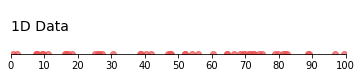

In [31]:
df['y'] = pd.Series(list(np.zeros(50))) # scatter 용 (y = 0)

ax = plt.subplot(4, 1, 1)

# plot의 위 빼고 테두리 지움
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')

# y axis label 삭제
ax.yaxis.set_major_locator(ticker.NullLocator())

# plot area 설정
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)

# x axis 단위 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.text(0, 0.5, "1D Data", fontsize = 14, transform = ax.transAxes)

plt.scatter(df.x, df.y, alpha = .7, color = '#ee5253');

## 2D 데이터셋

이번에는 feature가 2개입니다. (여전히 50 sample 입니다)


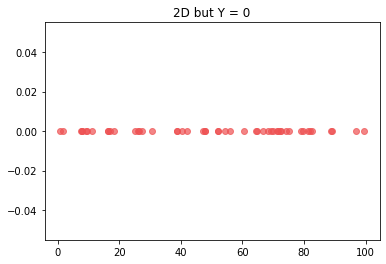

In [37]:
plt.scatter(df.x, df.y, alpha = .7, color = '#ee5253')
plt.title("2D but Y = 0");

In [38]:
# 임의의 50개 feature값을 생성
df['y'] = pd.Series(list(np.random.rand(N)*100))
df.head()

,x,y
0,99.570321,56.825630
1,18.300661,41.616738
2,81.983281,57.442173
3,16.302824,16.967459
4,72.573844,90.228736


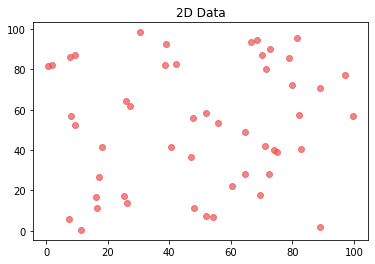

In [39]:
plt.scatter(df['x'], df['y'], alpha = .7, color = '#ee5253')
plt.title("2D Data");

## 3D의 데이터셋을 그려봅시다.

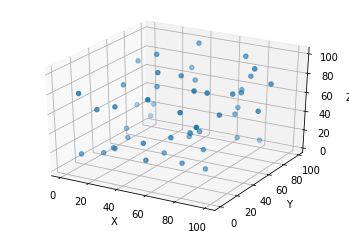

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# z 값을 추가
df['z'] = pd.Series(list(np.random.rand(N)*100))

threedee = plt.figure().gca(projection = '3d')
threedee.scatter(df['x'], df['y'], df['z'])
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## 만약 4D의 데이터셋은 어떻게 될까요?

물론 이론적으로는 아직 4D 그래프 까지는 가능합니다만 결과는 3D 그래프에 그리는 것에 비해서 전혀 의미가 없습니다.

<img src='https://mathworld.wolfram.com/images/eps-gif/HypercubeGraphUnitDistance_1000.gif' width = 600>


## 1000D의 데이터셋

올 것이 왔습니다. 

<img src='https://user-images.githubusercontent.com/6457691/89989454-f1167f80-dcbb-11ea-954d-2cffc7c3f62d.png' width = 400>

- 사실 사람의 뇌는 3차원 이상의 정보를 공간적으로 다루는 것이 **거의** 불가능 합니다. 

- 다시 말해 이는 여러 차원의 데이터셋을 다루는 데에 있어서 큰 이슈가 됩니다.


## 고차원 데이터를 분석하기 위한 노력

### 더 어려운 시각화

<https://seaborn.pydata.org/examples/scatterplot_matrix.html>

<img src="https://seaborn.pydata.org/_images/scatterplot_matrix.png" height=400 width=400>

위의 pairplot은 4차원 데이터셋에 포함 되어 있는 변수들의 가능한 조합에 대해서 scatter plot을 그리고, 동일한 변수 조합에 대해서는 Density plot을 그리고 있습니다.

문제 : 만약 1000차원의 데이터셋이라면 scatter plot은 몇개를 그려야 할까요? 

- 한가지 유념할 것은, pairplot에는 상당히 많은 양의 불필요한 scatterplot이 있습니다.


### 추가 feature 사용과 결과물

데이터셋에서 연관을 찾기 위해 쓰이는 모든 feature가 동일하게 중요하지는 않습니다. feature를 추가로 사용하는 것이 실제적으로 얼마나 의미있게 더 좋은 결과를 모델링 하게 되는지는 고민해야할 문제 입니다.

다음은 딥러닝 이미지 인식의 좋은 예시입니다:

<img src='https://user-images.githubusercontent.com/6457691/89990525-7babae80-dcbd-11ea-8e02-bbe27aa8c6bd.jpg' width = 500>

픽셀의 수를 늘리는 것이 (이미지의 해상도, 더 많은 feature) 우리가 이미지의 내용을 인지 하는 것에 얼마나 많은 영향을 주나요?

---

만약 추가 데이터를 사용하는 것이 결과물 performance의 발전에 비해서 더 높은 비용을 필요로 한다면, 어느 시점에서는 feature를 더 사용하는 것이 비용적인 면에서 효율적이지 않을것입니다.


### 높은 feature의 다른 문제점

샘플 수에 비해서 feature의 수가 너무 많은 경우, overfitting의 문제 또한 발생합니다. 

<img src='https://user-images.githubusercontent.com/6457691/89990876-f4126f80-dcbd-11ea-9046-8a4d7181d2ea.jpg'>

물론 이에 대해서 정확하게 정해진 기준이 있는 건 아니지만, 일반적으로 feature의 수를 $P$, sample의 수를 $N$이라 할 때 **P** $\geq$ **N** 인 경우 매우 높은 overfitting 이슈가 생긴다고 할 수 있습니다. 

### 관습적인 룰

이러한 feature 수에 관한 문제를 해결 하기 위해서 몇가지 수칙이 있습니다. 

1. P $\geq$ N 일 경우 overfitting 이슈 가 발생할 가능성이 매우 높음
2. 최소한 N = 5P 의 조건을 만족시켜야 합니다.
3. sample의 수는 많으면 많을 수록 좋습니다.
4. feature의 수는 무조건 많은 것이 좋지는 않습니다.
5. 유사도를 계산할때 Euclidean 을 사용 하지 않습니다. (Feature의 수가 많아질 경우 의미가 적어짐)


# 차원 축소 기술 (Dimensionality Reduction):

데이터의 시각화나 탐색이 어려워지는 것 뿐만 아니라 모델링에서의 overfitting 이슈를 포함하는 등 "빅데이터"인 데이터셋의 feature가 많으면 많을 수록 이로 인해 발생하는 문제는 점점 많아 질 것입니다. 

만약 "빅데이터"를 적절한 처리를 통해 충분한 의미를 유지하면서 더 작은 부분만 선택 할 수 있다면 어떨까요? 

머신러닝에서는 이를 위한 다양한 차원 축소 기술들이 이미 연구 되어 있습니다. 

## Feacture Selection: 

분석해야할 데이터셋에 100개의 feature가 있다고 해봅시다. 100종류의 feature를 전부 사용 하는 대신에, 데이터셋에서 제일 다양하게 **분포**되어있는 (1개의) feature를 사용하는 것입니다. 이처럼 Feature Selection이란 데이터셋에서 덜 중요한 feature를 제거 하는 방법을 의미합니다.

## Feature Extraction:

Feature Extraction이란, 앞서 feature engineering 부분에서 접해보았던 것 처럼, 기존에 있는 feature 혹은 그들을 바탕으로 조합된 feature를 사용 하는 것으로 PCA도 feature extraction의 한 예시입니다. 

## ❓ Selection 과 Extraction의 차이

<img src='https://user-images.githubusercontent.com/6457691/89991451-d1348b00-dcbe-11ea-8065-3b4293b0f682.png' width = 400>

# Principal Component Analysis (PCA) 

PCA란, 고차원의 데이터셋을 원본 데이터의 정보를 최대한 유지하면서 낮은 차원의 데이터셋으로 변환하는 기술을 의미합니다.

# 데이터의 분산 == 정보

<img src='https://user-images.githubusercontent.com/6457691/89992786-c11dab00-dcc0-11ea-9136-51f619596738.png' width = 500>


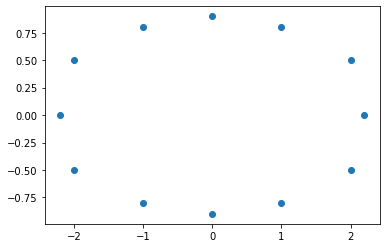

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

data = {"x": [-2.2, -2, -2, -1, -1, 0, 0, 1, 1, 2, 2, 2.2], 
        "y": [0, .5, -.5, .8, -.8, .9, -.9, .8, -.8, .5, -.5, 0]}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y']);

위의 scatter plot에 그려진 각 포인트들은, 2차원의 데이터셋을 의미한다고 가정해봅시다. 

2개의 feature중에서 1개만을 분석에 사용 해야 한다면, X와 Y 중 어느 feature를 사용 해야 할까요??


---

이번엔 조금 다른 예시 입니다. 만약 데이터가 위 처럼 X, Y 축에 평행하지 않다면 X와 Y중 어느 feature를 사용하는게 효율적일까요?

정답은 X, Y도 아닌 데이터의 흩어진 정도를 가장 크게 하는 벡터 축이 될 것입니다.

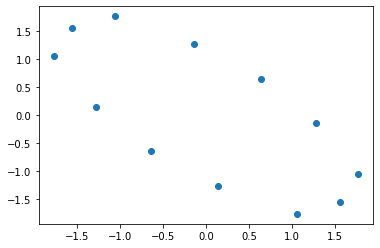

In [49]:
import math

df1 = df

df1["x_rotate"] = df1.apply(lambda x: (x.x+x.y)/math.sqrt(2), axis=1)
df1["y_rotate"] = df1.apply(lambda x: (x.y-x.x)/math.sqrt(2), axis=1)

plt.scatter(df1['x_rotate'], df1['y_rotate']);

# 본격적인 PCA : 단계

<https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/> (PCA 예제 1 부분 참조)


<img src='https://user-images.githubusercontent.com/6457691/89995442-6be39880-dcc4-11ea-9422-fb62f8500a86.png'>


## 1) 각 행에 대해서 평균을 빼는 것으로 스케일을 조정함

이로써 각 행의 평균 값은 0이 됩니다. 이를 하지 않으면, 데이터 별로 스케일이 다르기 때문에 더 유의미한 분산을 찾는 과정의 효과가 사라집니다.

## 2) 각 행에 대해서 표준편차로 나누어줌 

1)와 2)과정을 통해 데이터셋의 모든 행은 각각 평균 0, 표준편차 1의 값을 가지게 될 것이고 이 두 과정을 합쳐서 데이터의 표준화, 정규화 ("standardizing") 라고 합니다. 

이후, 정규화된 매트릭스를 $Z$ 매트릭스라고 부르겠습니다.

## 3) Z의 분산-공분산 매트릭스를 계산함

$Z^{T}Z$를 통해 계산 할 수 있습니다.

## 4) 분산-공분산 매트릭스의 고유벡터와 고유값을 계산함

고유벡터는, 주어진 데이터에 대해서 분산을 가장 크게 유지시키는 역할을 합니다.

## 5) 고유값, 고유벡터 쌍을 크기에 따라 정렬

일반적으로 고유값,고유 벡터는 여러개가 계산되며 이들의 크기는 데이터를 얼마나 **분산**시킬 수 있는 가와 연관이 있습니다. 즉, 가장 큰 쌍은 첫번째 Principal Component 로써 사용됩니다.

## 6) 데이터를 고유 벡터에 projection 시키는 것으로 매트릭스 변환을 함.

마지막 단계를 마치고 나면, 원래 데이터의 정보를 최대한 유지 하면서 차원을 줄이는 PCA를 마무리 지을 수 있습니다.

In [50]:
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

X = array([[1, 2], [3, 4], [5, 6]])
print("Data: ", X)
means = mean(X.T, axis=1)
print("\n Means: \n", means)
centered_data = X - means
print("\n Centered Data: \n", centered_data)
std_devs = std(X.T, axis=1)
print('\n Standard Deviations: \n', std_devs)
standardized_data = centered_data / std_devs
print("\n Standardized Data: \n", standardized_data)
covariance_matrix = cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
P = vectors.T.dot(standardized_data.T)
print("\n Projected Data: \n", P.T)

Data:  [[1 2]
 [3 4]
 [5 6]]

 Means: 
 [3. 4.]

 Centered Data: 
 [[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

 Standard Deviations: 
 [1.63299316 1.63299316]

 Standardized Data: 
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

 Covariance Matrix: 
 [[1.5 1.5]
 [1.5 1.5]]

 Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

 Eigenvalues: 
 [3. 0.]

 Projected Data: 
 [[-1.73205081e+00 -7.75139526e-18]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.73205081e+00  7.75139526e-18]]


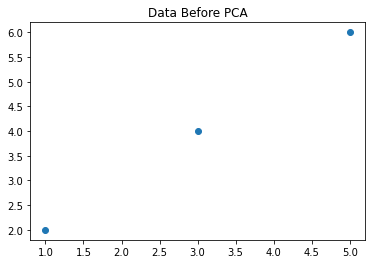

In [51]:
df = pd.DataFrame({"x": [1,3,5] , "y": [2,4,6]})

plt.scatter(df['x'], df['y'])
plt.title("Data Before PCA");

Text(0.5, 1.0, 'Data After PCA')

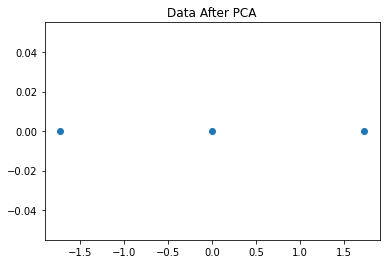

In [53]:
df = pd.DataFrame({"x": [-1.732,0,1.732] , "y": [0,0,0]})

plt.scatter(df['x'], df['y'])
plt.title("Data After PCA")

# 📕 라이브러리를 사용한 PCA

In [54]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = array([[1, 2], [3, 4], [5, 6]])
print("Data: \n", X)

scaler = StandardScaler()

Z = scaler.fit_transform(X)
print("\n Standardized Data: \n", Z)

pca = PCA(2)

pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B)

Data: 
 [[1 2]
 [3 4]
 [5 6]]

 Standardized Data: 
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

 Eigenvectors: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

 Eigenvalues: 
 [3.00000000e+00 1.23259516e-32]

 Projected Data: 
 [[-1.73205081e+00  7.75139526e-18]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.73205081e+00 -7.75139526e-18]]


<https://www.koreascience.or.kr/article/JAKO200411922371591.pdf>